In [1]:
# %pip install scikit-learn pandas joblib

# Operation 1

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

data = pd.read_csv('pose_data.csv') 

X = data.drop(columns=['Label'])  
y = data['Label']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(model, 'activity_classifier.pkl')


Classification Report:
                    precision    recall  f1-score   support

         backpain       0.00      0.00      0.00         2
            cough       1.00      1.00      1.00         4
         coughing       0.00      0.00      0.00         6
          falling       0.78      0.70      0.74        10
         headache       0.72      1.00      0.84        23
     heart stroke       0.76      0.86      0.81        22
      heartstroke       0.00      0.00      0.00         3
          sitting       1.00      0.88      0.94        17
         standing       0.73      0.73      0.73        11
standing normally       0.90      1.00      0.95         9
          walking       0.00      0.00      0.00         1

         accuracy                           0.79       108
        macro avg       0.53      0.56      0.54       108
     weighted avg       0.72      0.79      0.75       108



c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

['activity_classifier.pkl']

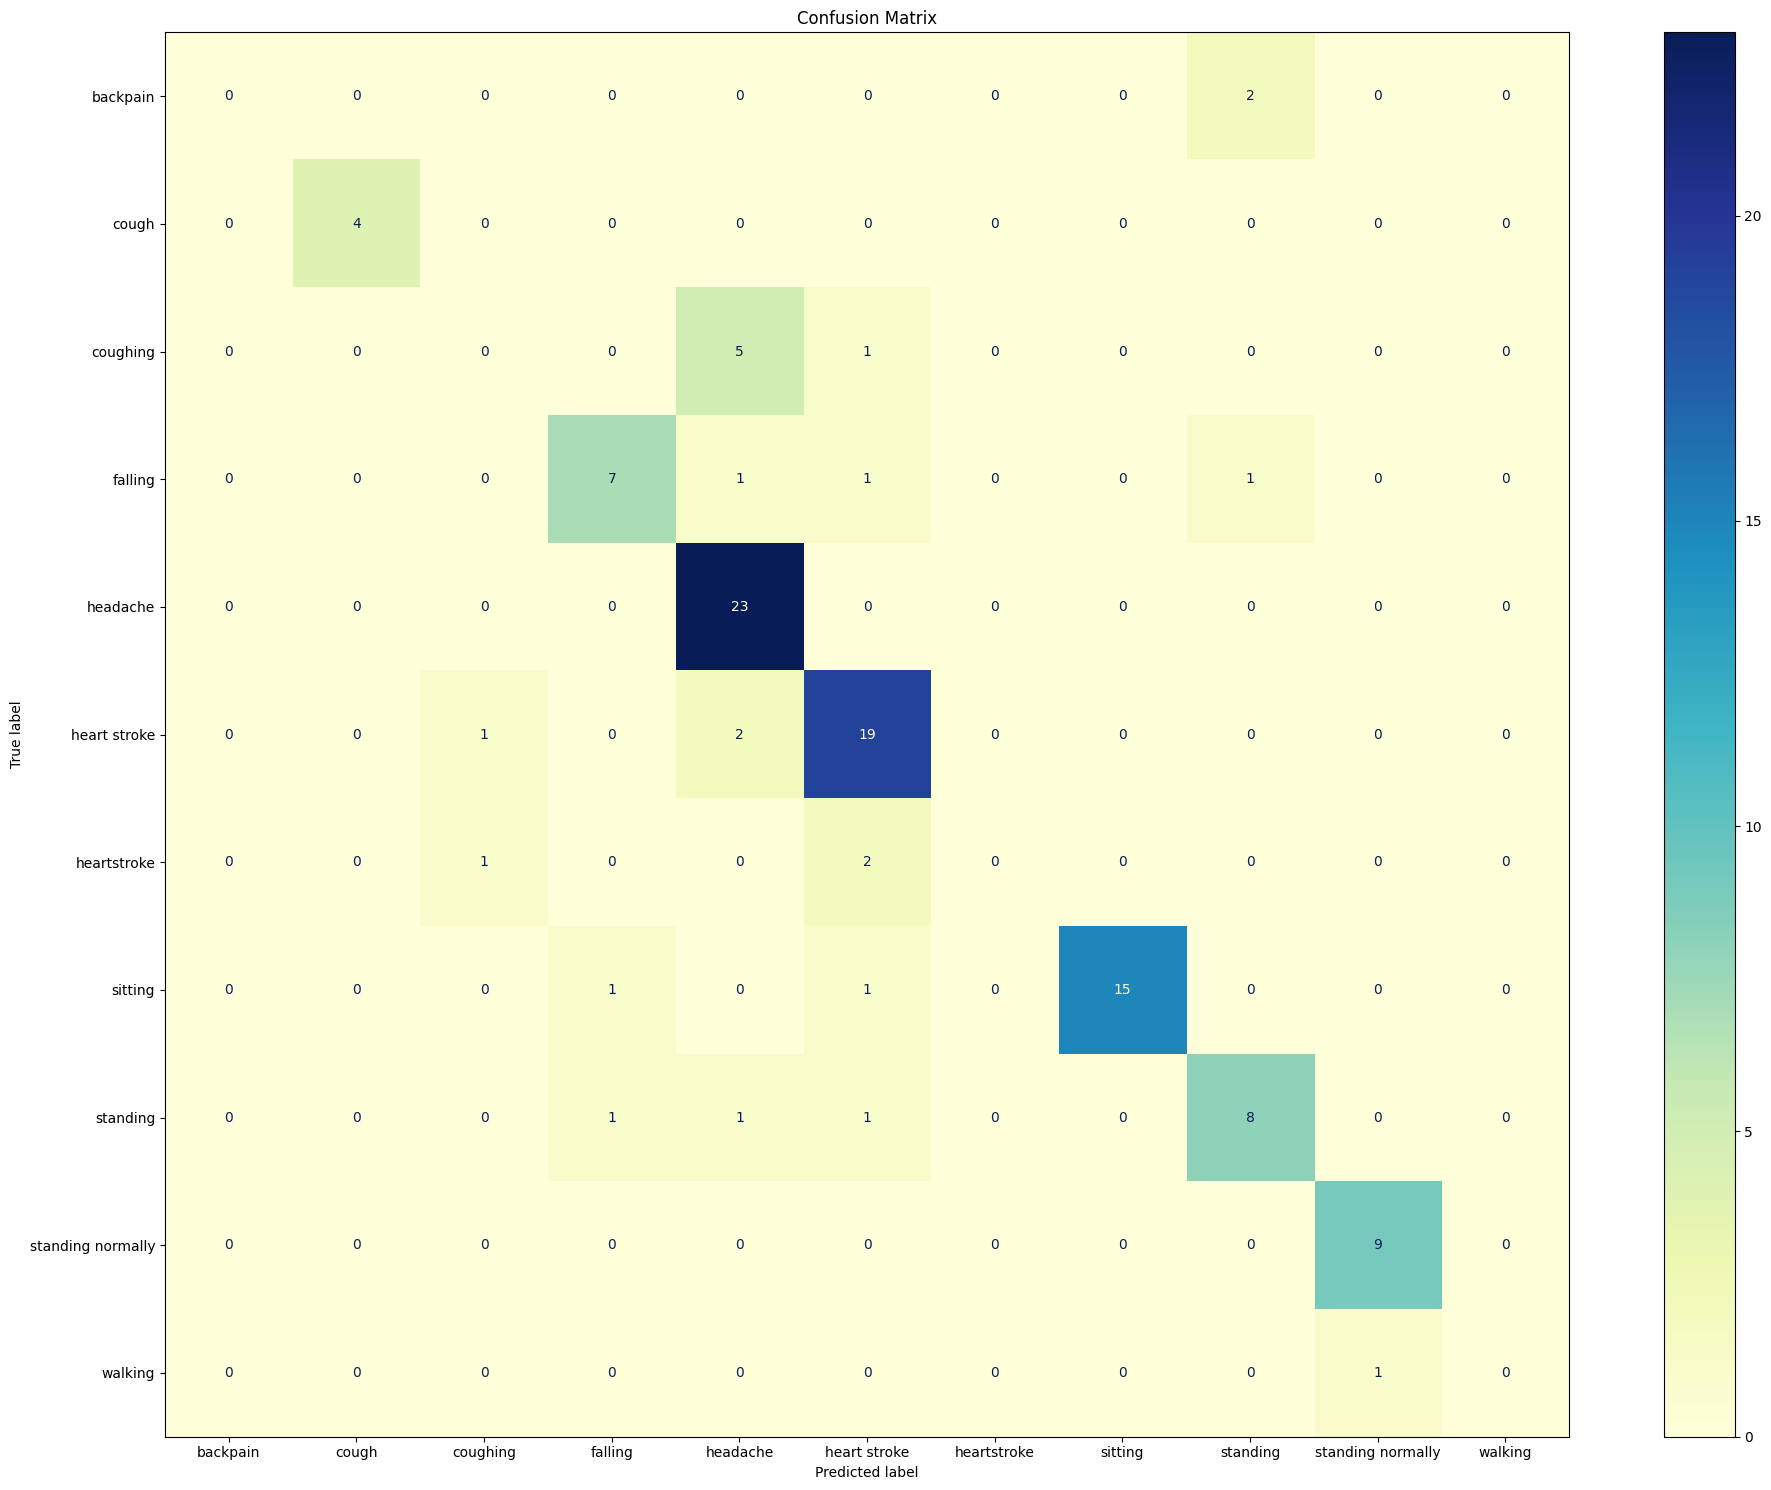

['activity_classifier.pkl']

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Ensure consistent label order
all_labels = model.classes_

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=all_labels)

# Create a larger figure to adjust height
fig, ax = plt.subplots(figsize=(20, 15))  # Width=8, Height=10
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)

# Use YlGnBu color map
disp.plot(cmap='YlGnBu', ax=ax)

plt.title("Confusion Matrix")
plt.tight_layout()  # Prevent labels from being cut off
plt.show()
joblib.dump(model, 'activity_classifier.pkl')

# Operation 2

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [41]:
# import cv2
# import mediapipe as mp
# import numpy as np
# import joblib
# import time

# model = joblib.load('activity_classifier.pkl')
# scaler = joblib.load('scaler.pkl')

# mp_pose = mp.solutions.pose
# mp_drawing = mp.solutions.drawing_utils

# def predict_activity(landmarks):
#     feature_vector = []
#     for landmark in landmarks:
#         feature_vector.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
    
#     feature_vector = np.array(feature_vector).reshape(1, -1)
#     feature_vector = scaler.transform(feature_vector)
    
#     activity = model.predict(feature_vector)
#     return activity[0]

# cap = cv2.VideoCapture(0)

# with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             print("Ignoring empty frame.")
#             break

#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image.flags.writeable = False

#         results = pose.process(image)

#         image.flags.writeable = True
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#         if results.pose_landmarks:
#             mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
#             landmarks = results.pose_landmarks.landmark
#             activity = predict_activity(landmarks)
#         else:
#             activity = "No Person Detected"

#         cv2.putText(image, f"Activity: {activity}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

#         cv2.imshow('Real-time Activity Detection', image)

#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()


## DEEP LEARNING

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import joblib

# Load the dataset
data = pd.read_csv('pose_data.csv')

# Separate features and labels
X = data.drop(columns=['Label'])
y = data['Label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save label encoder for future use
joblib.dump(label_encoder, 'label_encoder.pkl')

# Standardize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

# One-hot encode the labels for deep learning
y_one_hot = to_categorical(y_encoded)

# Train-test split (using stratify for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42, stratify=y_one_hot
)

# Build the deep learning model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_one_hot.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels back to integers

# Handle the classification report
labels = np.unique(y_test_labels)
print("Classification Report:\n", classification_report(
    y_test_labels,
    y_pred,
    labels=labels,
    target_names=label_encoder.inverse_transform(labels)
))

# Save the trained model
model.save('activity_classifier_deep.h5')


Epoch 1/50


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.1365 - loss: 2.4838 - val_accuracy: 0.3908 - val_loss: 1.8812
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3957 - loss: 1.8145 - val_accuracy: 0.5517 - val_loss: 1.5573
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6055 - loss: 1.4375 - val_accuracy: 0.6092 - val_loss: 1.3390
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5887 - loss: 1.2519 - val_accuracy: 0.6437 - val_loss: 1.1838
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6483 - loss: 1.1083 - val_accuracy: 0.6437 - val_loss: 1.0846
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7045 - loss: 1.0205 - val_accuracy: 0.7126 - val_loss: 1.0060
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7415 - loss: 0.9223 - val_accuracy: 0.7816 - val_loss: 0.9416
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6896 - loss: 0.8855 - val_accuracy: 0.7816 - val_loss: 0.

c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

Classification Report:
                    precision    recall  f1-score   support

         backpain       0.00      0.00      0.00         1
            cough       1.00      1.00      1.00         5
         coughing       0.20      0.12      0.15         8
          falling       0.90      0.69      0.78        13
         headache       0.84      0.93      0.89        29
     heart stroke       0.81      0.85      0.83        20
      heartstroke       0.00      0.00      0.00         1
          sitting       0.93      0.87      0.90        15
         standing       0.71      1.00      0.83        10
standing normally       0.86      1.00      0.92         6

         accuracy                           0.81       108
        macro avg       0.63      0.65      0.63       108
     weighted avg       0.79      0.81      0.80       108



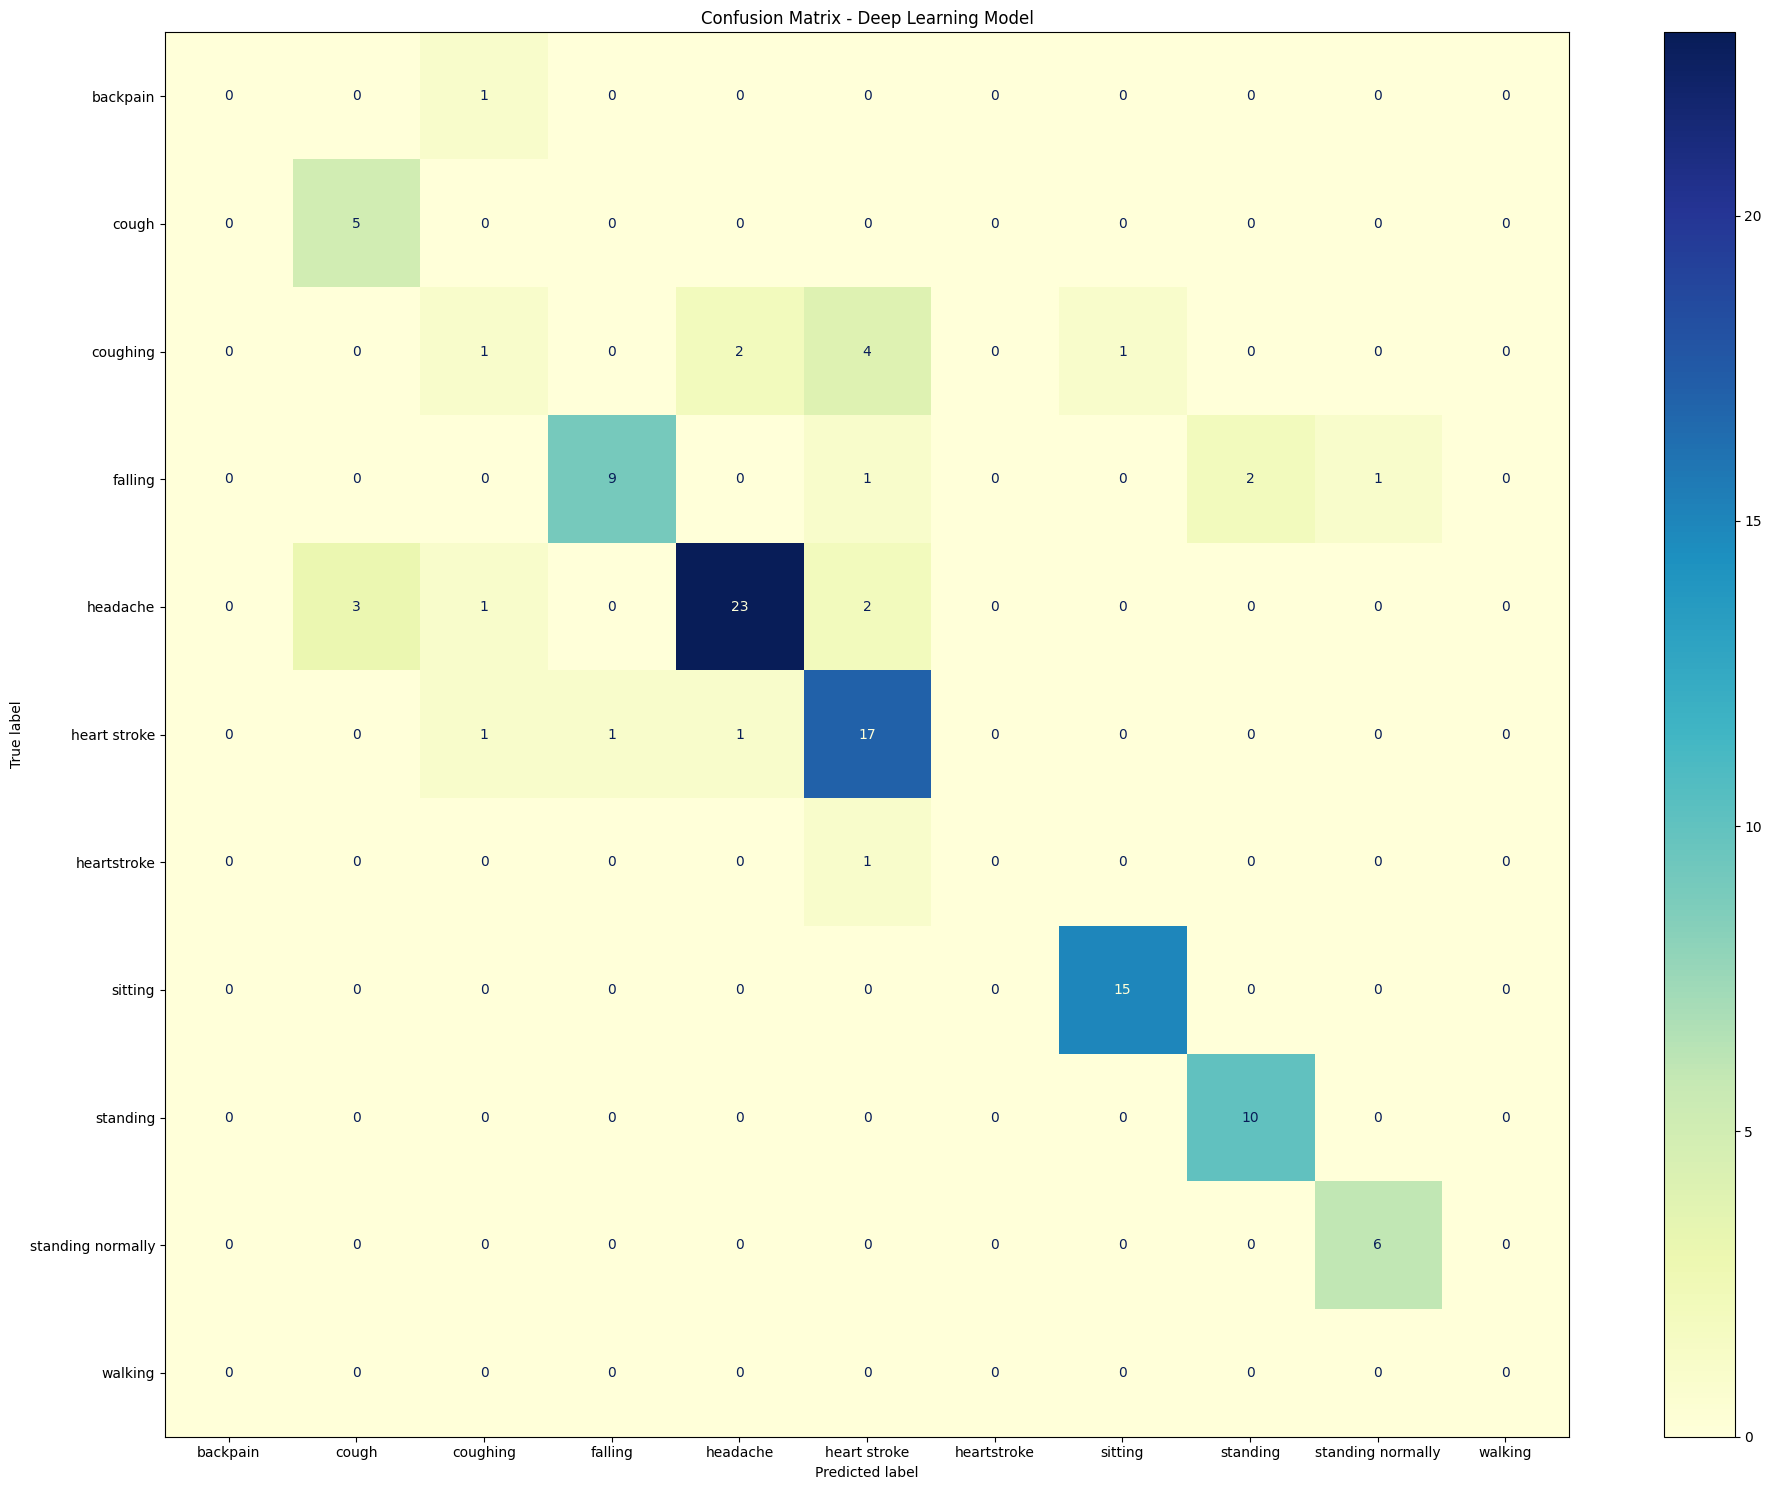

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert predictions and true labels from one-hot to integer
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get the list of class labels (decoded)
class_labels = label_encoder.classes_

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(class_labels)))

# Plot the confusion matrix with YlGnBu color and adjusted figure height
fig, ax = plt.subplots(figsize=(20, 15))  # Adjust height as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='YlGnBu', ax=ax)

plt.title("Confusion Matrix - Deep Learning Model")
plt.tight_layout()
plt.show()

# TEST 2


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import joblib

# Load the dataset
data = pd.read_csv('pose_data.csv')

# Separate features and labels
X = data.drop(columns=['Label'])
y = data['Label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save label encoder for future use
joblib.dump(label_encoder, 'label_encoder.pkl')

# Standardize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

# One-hot encode the labels for deep learning
y_one_hot = to_categorical(y_encoded)

# Train-test split (using stratify for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42, stratify=y_one_hot
)

# Build the deep learning model
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(y_one_hot.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=64,
    validation_split=0.2,
    callbacks=[reduce_lr, early_stop]
)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels back to integers

# Classification report
labels = np.unique(y_test_labels)
print("Classification Report:\n", classification_report(
    y_test_labels,
    y_pred,
    labels=labels,
    target_names=label_encoder.inverse_transform(labels)
))

# Save the trained model
model.save('activity_classifier_optimized.h5')

print("Model and preprocessing artifacts saved successfully!")


Epoch 1/500


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.1036 - loss: 3.6976 - val_accuracy: 0.2874 - val_loss: 2.5563 - learning_rate: 0.0010
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1515 - loss: 3.1106 - val_accuracy: 0.3678 - val_loss: 2.4012 - learning_rate: 0.0010
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3000 - loss: 2.5554 - val_accuracy: 0.5287 - val_loss: 2.2787 - learning_rate: 0.0010
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3753 - loss: 2.3842 - val_accuracy: 0.5632 - val_loss: 2.1699 - learning_rate: 0.0010
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4684 - loss: 2.2331 - val_accuracy: 0.5977 - val_loss: 2.0807 - learning_rate: 0.0010
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4884 - loss: 1.9891 - val_accuracy: 0.5977 - val_loss: 2.0018 - learning_rate: 0.0010
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5567 - loss: 1.7141 - val_accuracy: 0.6092 - val

c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

Classification Report:
                    precision    recall  f1-score   support

         backpain       0.00      0.00      0.00         1
            cough       0.62      1.00      0.77         5
         coughing       0.29      0.25      0.27         8
          falling       0.89      0.62      0.73        13
         headache       0.76      0.76      0.76        29
     heart stroke       0.74      0.85      0.79        20
      heartstroke       0.00      0.00      0.00         1
          sitting       1.00      0.93      0.97        15
         standing       0.83      1.00      0.91        10
standing normally       1.00      1.00      1.00         6

         accuracy                           0.78       108
        macro avg       0.61      0.64      0.62       108
     weighted avg       0.77      0.78      0.77       108

Model and preprocessing artifacts saved successfully!


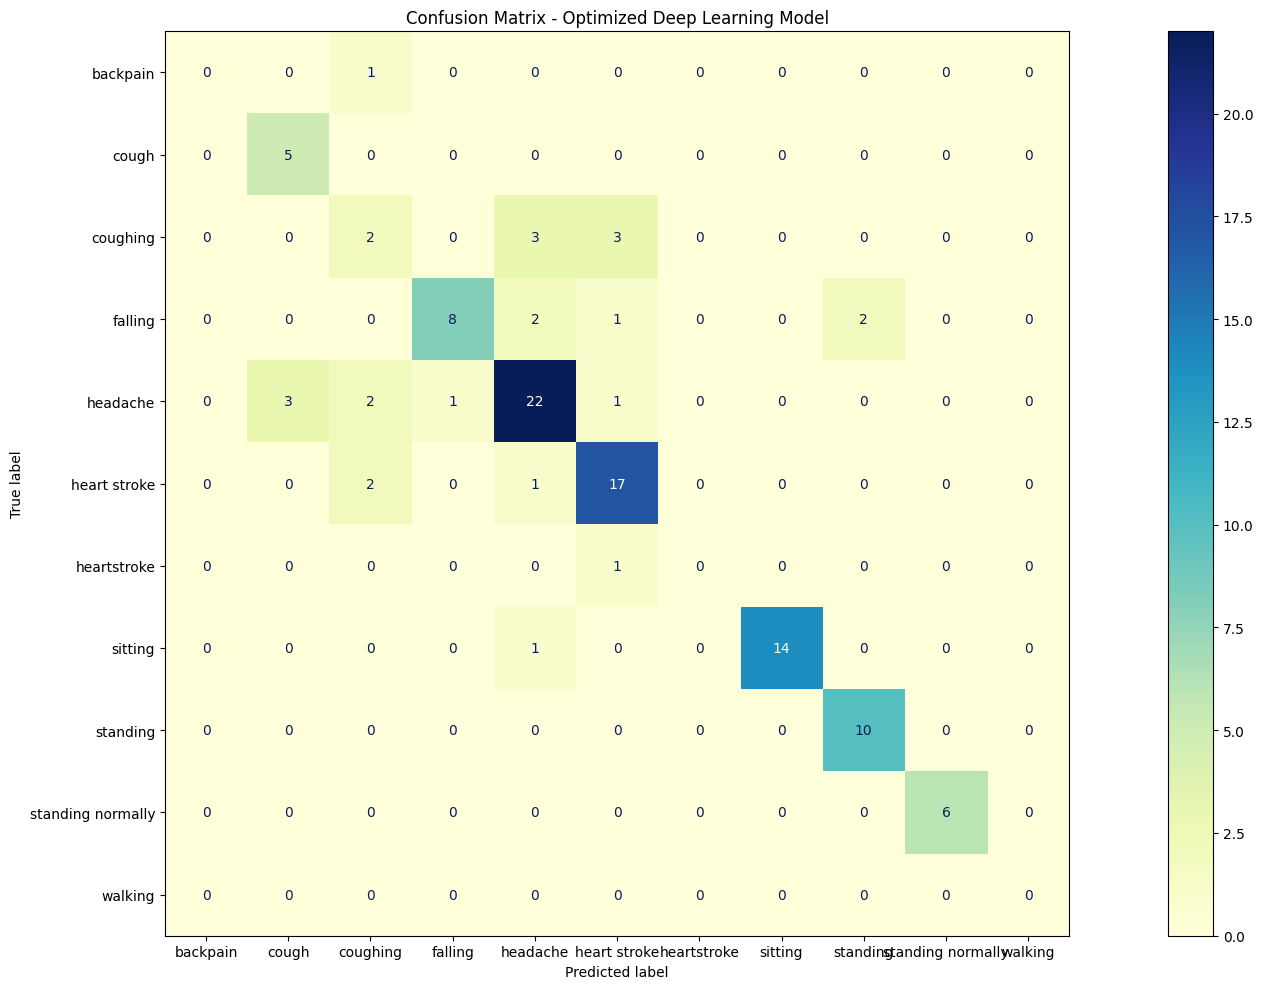

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decode class labels from the label encoder
class_labels = label_encoder.classes_

# Create confusion matrix
cm = confusion_matrix(y_test_labels, y_pred, labels=np.arange(len(class_labels)))

# Plot confusion matrix with 'YlGnBu' color map and larger figure height
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='YlGnBu', ax=ax)

plt.title("Confusion Matrix - Optimized Deep Learning Model")
plt.tight_layout()
plt.show()


# Cam TEst 2

In [29]:
import cv2
import mediapipe as mp
import numpy as np
import joblib
import tensorflow as tf

# Load the trained model, scaler, and label encoder
model = tf.keras.models.load_model('activity_classifier_optimized.h5')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Function to preprocess pose landmarks
def preprocess_landmarks(landmarks):
    try:
        feature_vector = [
            [landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in landmarks
        ]
        feature_vector = np.array(feature_vector).flatten().reshape(1, -1)
        feature_vector = scaler.transform(feature_vector)  # Standardize the feature vector
        return feature_vector
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None

# Function to predict activity from processed landmarks
def predict_activity(processed_landmarks):
    try:
        predictions = model.predict(processed_landmarks)
        predicted_class = np.argmax(predictions, axis=1)[0]
        return label_encoder.inverse_transform([predicted_class])[0]
    except Exception as e:
        print(f"Error during prediction: {e}")
        return "Prediction Error"

# Start webcam feed
cap = cv2.VideoCapture(0)

# Initialize Mediapipe Pose estimation
with mp_pose.Pose(min_detection_confidence=0.7, min_tracking_confidence=0.7) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("No frame received from webcam. Exiting.")
            break

        # Convert image to RGB for Mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Process pose landmarks
        results = pose.process(image)

        # Convert back to BGR for OpenCV display
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # If pose landmarks are detected
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            landmarks = results.pose_landmarks.landmark

            # Preprocess landmarks and predict activity
            processed_landmarks = preprocess_landmarks(landmarks)
            activity = (
                predict_activity(processed_landmarks)
                if processed_landmarks is not None
                else "Processing Error"
            )
        else:
            activity = "No Person Detected"

        # Display the activity label on the video feed
        cv2.putText(image, f"Activity: {activity}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Show the video feed
        cv2.imshow('Real-time Activity Detection', image)

        # Quit with 'q' key
        if cv2.waitKey(10) & 0xFF == ord('q'):
            print("Exiting application.")
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Exiting application.


# TEST 3

Epoch 1/150


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.1976 - loss: 3.6546 - val_accuracy: 0.4483 - val_loss: 2.6771 - learning_rate: 0.0010
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4096 - loss: 2.6598 - val_accuracy: 0.5057 - val_loss: 2.4892 - learning_rate: 0.0010
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5351 - loss: 2.2030 - val_accuracy: 0.5402 - val_loss: 2.3453 - learning_rate: 0.0010
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6473 - loss: 1.9507 - val_accuracy: 0.5517 - val_loss: 2.2534 - learning_rate: 0.0010
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6977 - loss: 1.7570 - val_accuracy: 0.6322 - val_loss: 2.1825 - learning_rate: 0.0010
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6559 - loss: 1.7566 - val_accuracy: 0.6437 - val_loss: 2.1105 - learning_rate: 0.0010
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7335 - loss: 1.6755 - val_accuracy: 0.6437 - val

c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

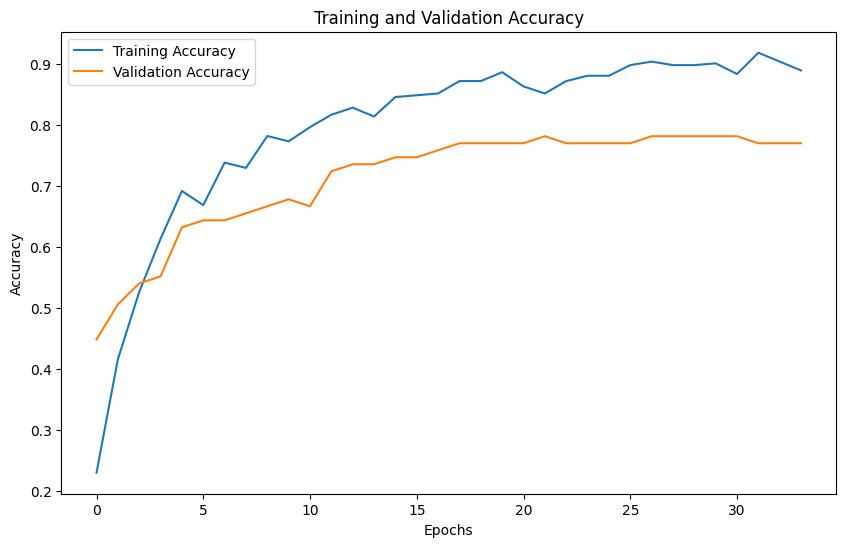

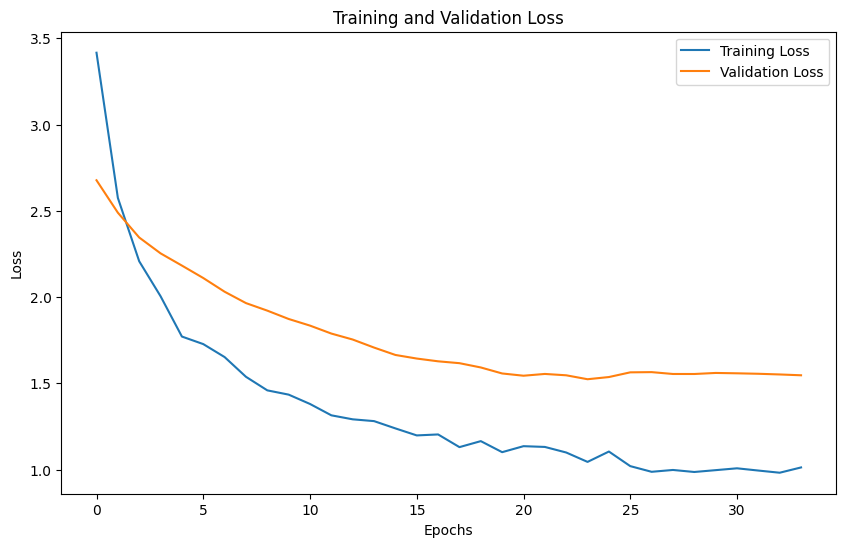

Model and preprocessing artifacts saved successfully!


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import joblib

# Load the dataset
data = pd.read_csv('pose_data.csv')

# Separate features and labels
X = data.drop(columns=['Label'])
y = data['Label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save label encoder for future use
joblib.dump(label_encoder, 'label_encoder.pkl')

# Standardize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

# One-hot encode the labels for deep learning
y_one_hot = to_categorical(y_encoded)

# Train-test split (using stratify for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42, stratify=y_encoded
)

# Build the deep learning model
model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(y_one_hot.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    validation_split=0.2,
    callbacks=[reduce_lr, early_stop]
)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels back to integers

# Classification report
labels = np.unique(y_test_labels)
print("Classification Report:\n", classification_report(
    y_test_labels,
    y_pred,
    labels=labels,
    target_names=label_encoder.inverse_transform(labels)
))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
model.save('activity_classifier_optimized.h5')

print("Model and preprocessing artifacts saved successfully!")


# cam test 3

In [31]:
import cv2
import numpy as np
import tensorflow as tf
import joblib
import mediapipe as mp

# Load the trained model, scaler, and label encoder
model = tf.keras.models.load_model('activity_classifier_optimized.h5')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Initialize Mediapipe Pose for pose detection
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Function to preprocess pose landmarks
def preprocess_landmarks(landmarks):
    try:
        # Extract features (x, y, z, visibility) for each landmark
        feature_vector = [
            [landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in landmarks
        ]
        feature_vector = np.array(feature_vector).flatten().reshape(1, -1)
        feature_vector = scaler.transform(feature_vector)  # Standardize the feature vector
        return feature_vector
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None

# Function to predict activity from processed landmarks
def predict_activity(processed_landmarks):
    try:
        predictions = model.predict(processed_landmarks)
        predicted_class = np.argmax(predictions, axis=1)[0]
        return label_encoder.inverse_transform([predicted_class])[0]
    except Exception as e:
        print(f"Error during prediction: {e}")
        return "Prediction Error"

# Start webcam feed
cap = cv2.VideoCapture(0)

# Initialize Mediapipe Pose estimation
with mp_pose.Pose(min_detection_confidence=0.7, min_tracking_confidence=0.7) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("No frame received from webcam. Exiting.")
            break

        # Convert image to RGB for Mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Process pose landmarks
        results = pose.process(image)

        # Convert back to BGR for OpenCV display
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # If pose landmarks are detected
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            landmarks = results.pose_landmarks.landmark

            # Preprocess landmarks and predict activity
            processed_landmarks = preprocess_landmarks(landmarks)
            activity = (
                predict_activity(processed_landmarks)
                if processed_landmarks is not None
                else "Processing Error"
            )
        else:
            activity = "No Person Detected"

        # Display the activity label on the video feed
        cv2.putText(image, f"Activity: {activity}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Show the video feed
        cv2.imshow('Real-time Activity Detection', image)

        # Quit with 'q' key
        if cv2.waitKey(10) & 0xFF == ord('q'):
            print("Exiting application.")
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


Exiting application.


# TEST 4

In [25]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Operation 4

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import joblib

# Load the dataset
data = pd.read_csv('pose_data.csv')

# Separate features and labels
X = data.drop(columns=['Label'])
y = data['Label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save label encoder for future use
joblib.dump(label_encoder, 'label_encoder.pkl')

# Standardize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

# One-hot encode the labels for deep learning
y_one_hot = to_categorical(y_encoded)

# Train-test split (using stratify for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42, stratify=y_one_hot
)

# Build the deep learning model with improved architecture
model = Sequential([    
    Dense(512, activation='relu', kernel_regularizer=l2(0.0005), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(y_one_hot.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower learning rate for more stability
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)  # Longer patience

# Train the model with additional steps
history = model.fit(
    X_train, y_train,
    epochs=1000,  # Increased epochs to allow for more training time
    batch_size=64,
    validation_split=0.2,
    callbacks=[reduce_lr, early_stop],
    shuffle=True  # Shuffle data during training
)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels back to integers

# Classification report
labels = np.unique(y_test_labels)
print("Classification Report:\n", classification_report(
    y_test_labels,
    y_pred,
    labels=labels,
    target_names=label_encoder.inverse_transform(labels)
))

# Save the entire model (architecture, weights, and optimizer state)
model.save('activity_classifier_optimized.h5')

# Save only the model weights (ensure the filename ends with `.weights.h5`)
model.save_weights('model_weights.weights.h5')

print("Model and preprocessing artifacts saved successfully!")


Epoch 1/1000


c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.0743 - loss: 3.9600 - val_accuracy: 0.1609 - val_loss: 2.8167 - learning_rate: 5.0000e-04
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0718 - loss: 3.7234 - val_accuracy: 0.2989 - val_loss: 2.7540 - learning_rate: 5.0000e-04
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1544 - loss: 3.2813 - val_accuracy: 0.2989 - val_loss: 2.6920 - learning_rate: 5.0000e-04
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1601 - loss: 3.1383 - val_accuracy: 0.3793 - val_loss: 2.6240 - learning_rate: 5.0000e-04
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2061 - loss: 2.8958 - val_accuracy: 0.4253 - val_loss: 2.5566 - learning_rate: 5.0000e-04
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2525 - loss: 2.6956 - val_accuracy: 0.4598 - val_loss: 2.4761 - learning_rate: 5.0000e-04
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2844 - loss: 2.715

c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\riya kansal\Desktop\Elderly-Abnormal-Activity-Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

Classification Report:
                    precision    recall  f1-score   support

         backpain       0.00      0.00      0.00         1
            cough       0.62      1.00      0.77         5
         coughing       0.25      0.12      0.17         8
          falling       0.90      0.69      0.78        13
         headache       0.88      0.79      0.84        29
     heart stroke       0.68      0.85      0.76        20
      heartstroke       0.00      0.00      0.00         1
          sitting       0.94      1.00      0.97        15
         standing       0.83      1.00      0.91        10
standing normally       0.86      1.00      0.92         6

         accuracy                           0.80       108
        macro avg       0.60      0.65      0.61       108
     weighted avg       0.77      0.80      0.78       108

Model and preprocessing artifacts saved successfully!


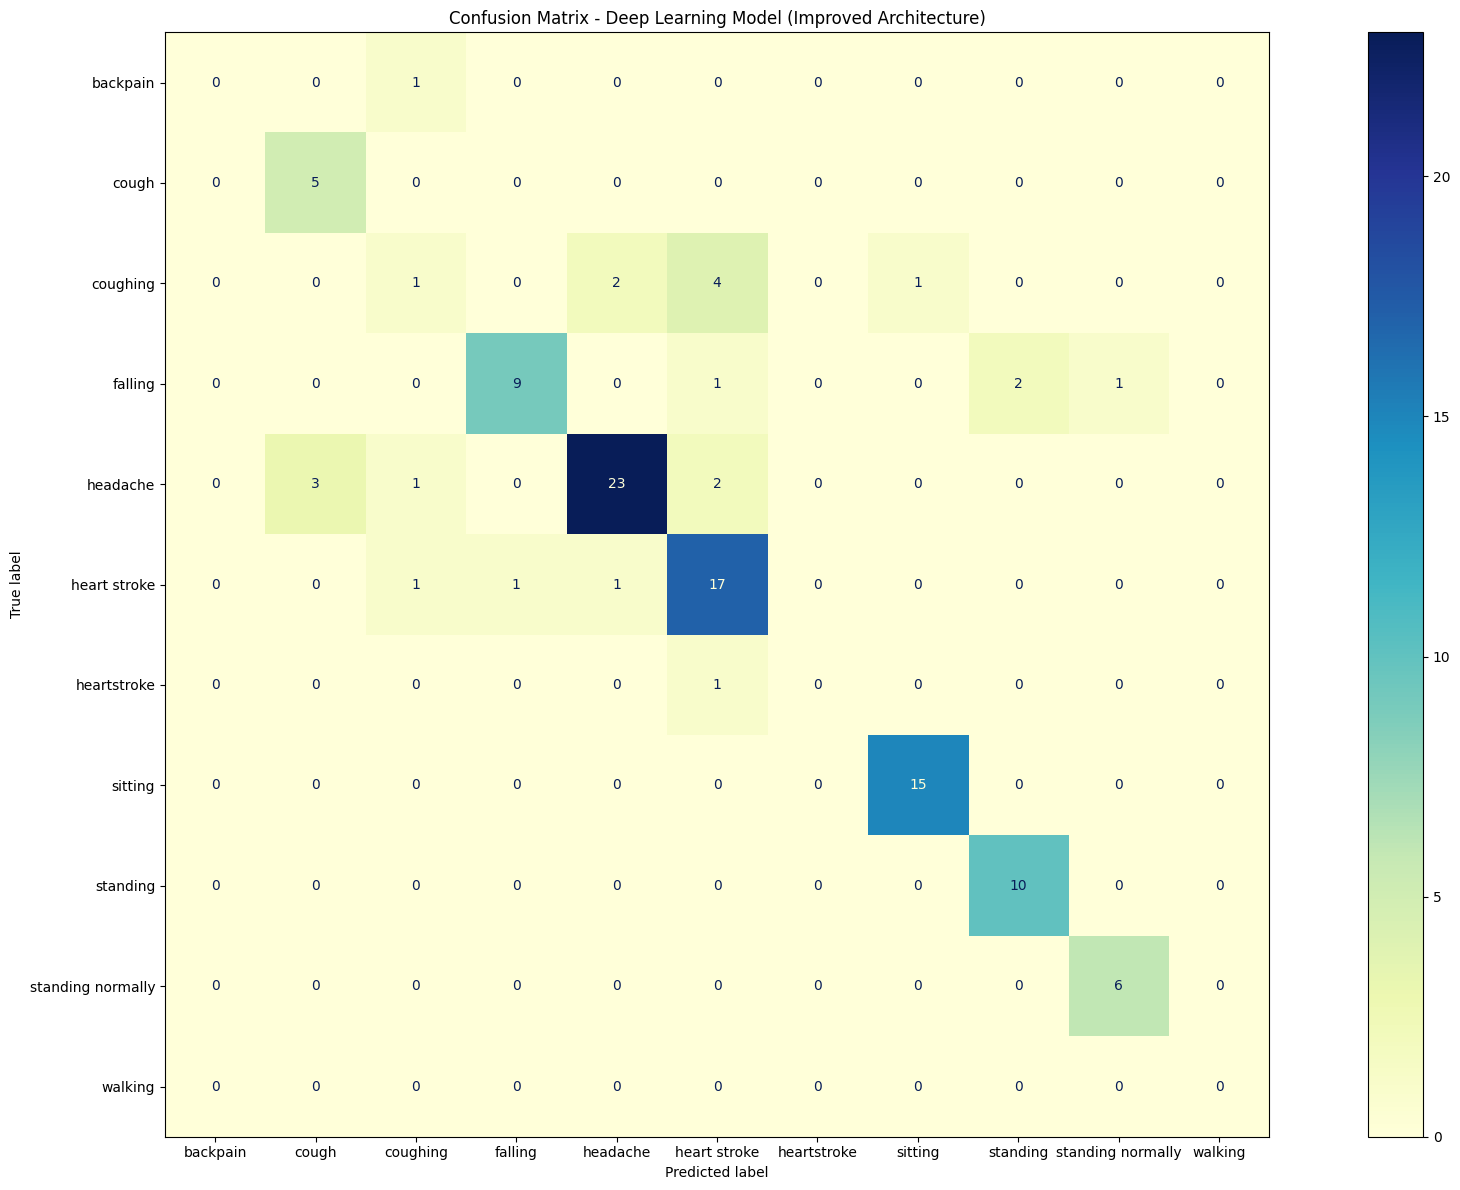

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
class_labels = label_encoder.classes_
cm = confusion_matrix(y_test_labels, y_pred, labels=np.arange(len(class_labels)))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(20, 12))  # Adjust height for better readability
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='YlGnBu', ax=ax)

plt.title("Confusion Matrix - Deep Learning Model (Improved Architecture)")
plt.tight_layout()
plt.show()

# cam test 4

In [34]:
import cv2
import mediapipe as mp
import numpy as np
import joblib
import tensorflow as tf

# Load the trained model, scaler, and label encoder
model = tf.keras.models.load_model('activity_classifier_optimized.h5')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Function to preprocess pose landmarks
def preprocess_landmarks(landmarks):
    try:
        feature_vector = [
            [landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in landmarks
        ]
        feature_vector = np.array(feature_vector).flatten().reshape(1, -1)
        feature_vector = scaler.transform(feature_vector)  # Standardize the feature vector
        return feature_vector
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None

# Function to predict activity from processed landmarks
def predict_activity(processed_landmarks):
    try:
        predictions = model.predict(processed_landmarks)
        predicted_class = np.argmax(predictions, axis=1)[0]
        return label_encoder.inverse_transform([predicted_class])[0]
    except Exception as e:
        print(f"Error during prediction: {e}")
        return "Prediction Error"

# Start webcam feed
cap = cv2.VideoCapture(0)

# Initialize Mediapipe Pose estimation
with mp_pose.Pose(min_detection_confidence=0.7, min_tracking_confidence=0.7) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("No frame received from webcam. Exiting.")
            break

        # Convert image to RGB for Mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Process pose landmarks
        results = pose.process(image)

        # Convert back to BGR for OpenCV display
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # If pose landmarks are detected
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            landmarks = results.pose_landmarks.landmark

            # Preprocess landmarks and predict activity
            processed_landmarks = preprocess_landmarks(landmarks)
            activity = (
                predict_activity(processed_landmarks)
                if processed_landmarks is not None
                else "Processing Error"
            )
        else:
            activity = "No Person Detected"

        # Display the activity label on the video feed
        cv2.putText(image, f"Activity: {activity}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Show the video feed
        cv2.imshow('Real-time Activity Detection', image)

        # Quit with 'q' key
        if cv2.waitKey(10) & 0xFF == ord('q'):
            print("Exiting application.")
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


Exiting application.
